In [12]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import sys
print(sys.executable)


/Users/sidharth/Desktop/Systems/Coding/venv/bin/python


In [ ]:
from pathlib import Path
import pandas as pd

def load_housing_data():
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing_full = load_housing_data()

# Info about the data 
housing_full.info()


<class 'pandas.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  str    
dtypes: float64(9), str(1)
memory usage: 1.6 MB


In [ ]:
# Value count if there are multiple attributes with the same string name
housing_full["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [ ]:
# Statistical Data on the file
housing_full.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


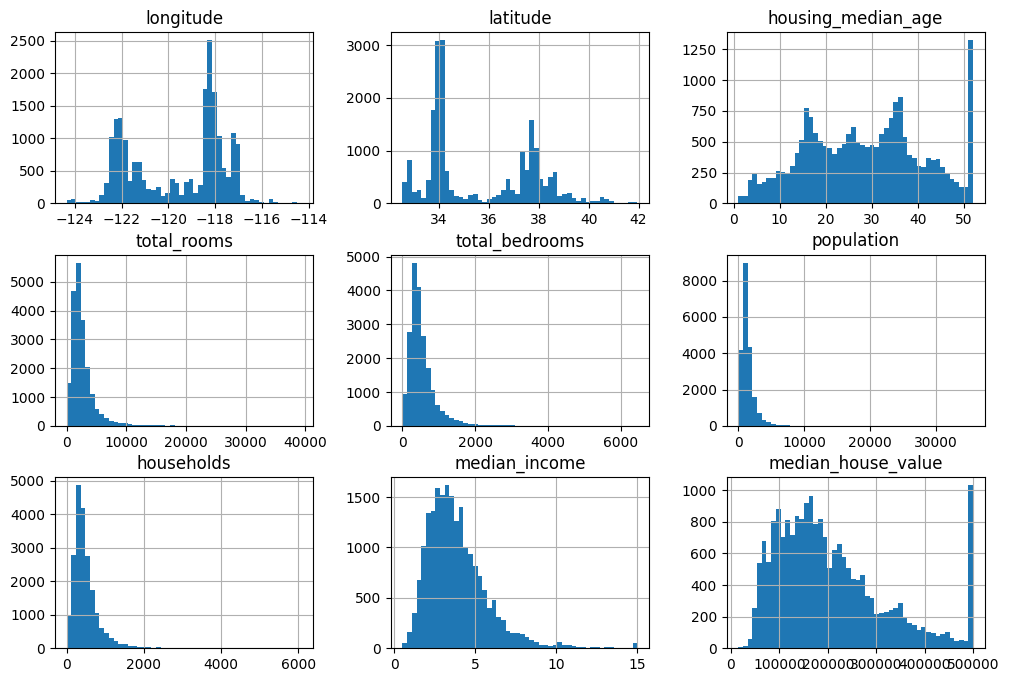

In [11]:
housing_full.hist(bins=50,figsize=(12,8))
plt.show()

In [ ]:
# Creating Test Data

def shuffling_and_split(data, test_ratio, rng):
    shuffled_indices = rng.permutation(len(data))
    test_size = int(len(data)* test_ratio)
    test_set = shuffled_indices[:test_size]
    train_set = shuffled_indices[test_size:]
    return data.iloc[train_set],data.iloc[test_set]  # Selects rows with indices in that training and test set

rng = np.random.default_rng() # Helps generate random number
train_set, test_set = shuffling_and_split(housing_full, 0.2, rng)

print(len(housing_full))
print(len(train_set))
print(len(test_set))


20640
16512
4128


In [ ]:
# Hashing for Splitting Data
# Before there was an uncertainity when we add new data so we use Hashing
# A function that takes an input (like an ID) and gives you a random-looking but repeatable number

from zlib import crc32

def is_in_test_set(indetifier, test_ratio):
    return crc32(np.int64(indetifier)) < test_ratio * 2**32

def split_with_hash_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_test = ids.apply(lambda id_: is_in_test_set(id_,test_ratio))  
    return data.loc[~in_test_test], data.loc[in_test_test]

housing_with_id = housing_full.reset_index()
train_set, test_set = split_with_hash_id(housing_with_id, 0.2,"index")

print(len(train_set))
print(len(test_set))



16512
4128


In [24]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing_full, test_size = 0.2, random_state = 42)

print(len(train_set))
print(len(test_set))

16512
4128


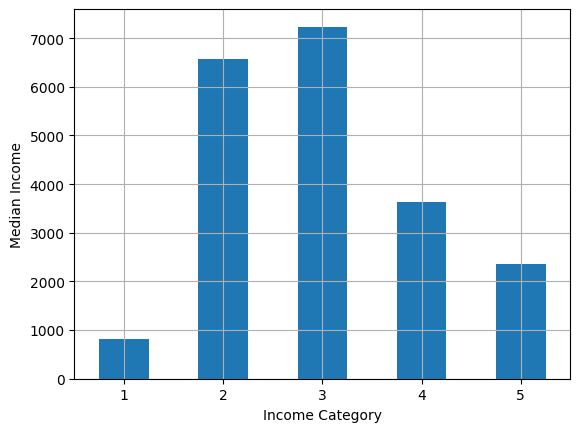

In [ ]:
# Stratified Sampling
# Suppose we want to make sure distribution is even in sub grps we make

# Makes a new column for income_cat
housing_full["income_cat"] = pd.cut(housing_full["median_income"],bins=[0.,1.5,3.0,4.5,6.,np.inf],labels=[1,2,3,4,5])
cat_counts = housing_full["income_cat"].value_counts().sort_index()
cat_counts.plot.bar(rot = 0,grid = True)
plt.xlabel("Income Category")
plt.ylabel("Median Income")
plt.show()

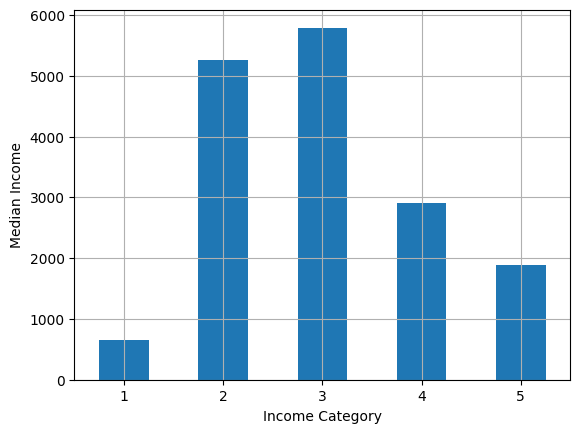

In [34]:
from sklearn.model_selection import StratifiedShuffleSplit

# Here it does stratifies split into 10 categories
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []

for train_index,test_index in splitter.split(housing_full,housing_full["income_cat"]):
    strat_train_set = housing_full.iloc[train_index]
    strat_test_set = housing_full.iloc[test_index]
    strat_splits.append([strat_train_set,strat_test_set])

strat_train_set,strat_test_set = strat_splits[0]

cat_counts = strat_train_set["income_cat"].value_counts().sort_index()
cat_counts.plot.bar(rot = 0,grid = True)
plt.xlabel("Income Category")
plt.ylabel("Median Income")
plt.show()


In [47]:
housing_full[["median_income", "income_cat"]]

sorted_median_values = housing_full.sort_values("income_cat")
sorted_median_values[["median_income","income_cat"]]


,median_income,income_cat
9217,1.2794,1
12534,1.1280,1
12535,1.0649,1
15719,1.4866,1
15718,1.3062,1
...,...,...
12000,7.5408,5
11999,7.0215,5
11961,7.7197,5
12014,7.8118,5


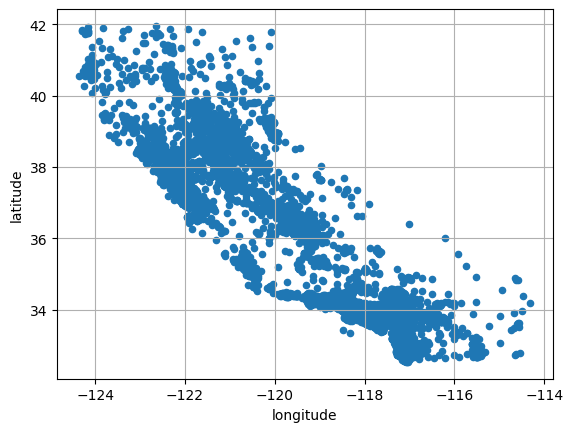

In [51]:
# Visualising Data

housing = strat_train_set.copy()
housing.plot(kind = "scatter",x = "longitude",y="latitude",grid = "True")
plt.show()

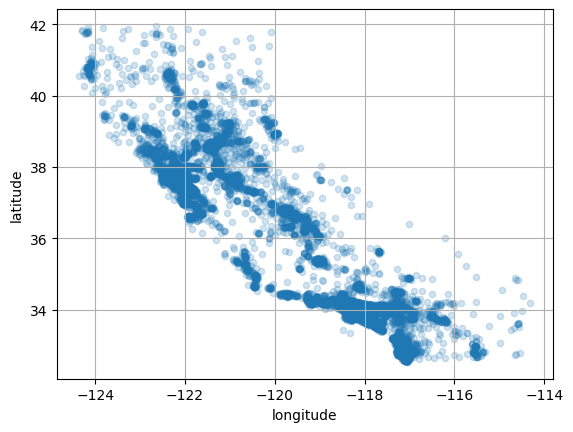

In [52]:
housing = strat_train_set.copy()
housing.plot(kind = "scatter",x = "longitude",y ="latitude",grid="True",alpha=0.2)
plt.show()

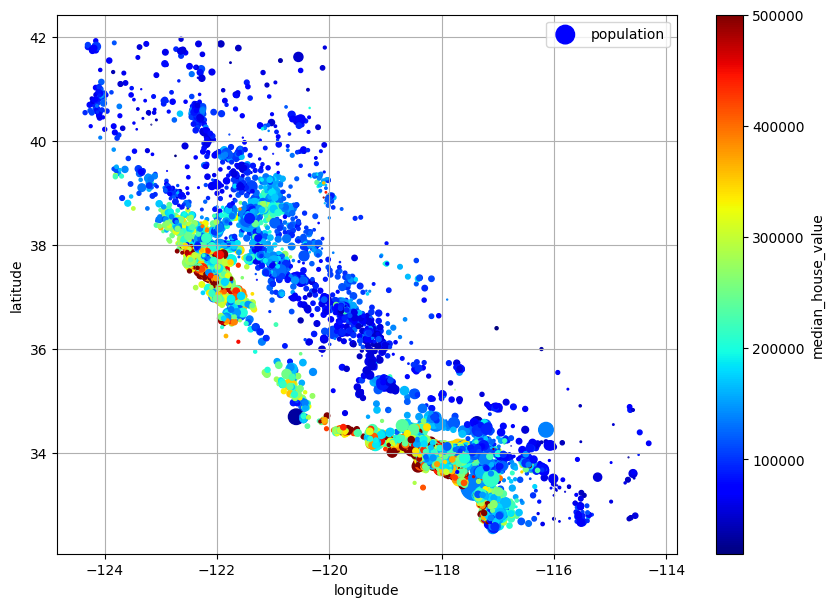

In [ ]:
housing.plot(kind="scatter",x="longitude",y="latitude",grid=True,s=housing["population"]/100,label="population",
             c="median_house_value", cmap="jet", colorbar=True,legend=True, sharex=False, figsize=(10, 7))
# s gives radius depending upon the population
# c helps in cmap thats all 
plt.show()